In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression, lasso_path

In [2]:
data_raw = pd.read_csv('./income_democracy.csv')
display(data_raw)

data_raw = data_raw.dropna()
#display(data_raw)

,country,year,dem_ind,log_gdppc,log_pop,age_1,age_2,age_3,age_4,age_5,educ,age_median,code
0,Andorra,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Andorra,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Andorra,1970,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Andorra,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Andorra,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,Zimbabwe,1980,0.666667,7.831994,8.716208,0.487388,0.249146,0.135395,0.081204,0.046867,2.147,15.600000,211
1365,Zimbabwe,1985,0.500000,7.876341,8.872487,0.490522,0.261934,0.124533,0.075827,0.047184,2.816,15.400000,211
1366,Zimbabwe,1990,0.166667,7.913739,9.061492,0.477027,0.272603,0.132026,0.073196,0.045149,2.828,16.000000,211
1367,Zimbabwe,1995,0.333333,7.977293,9.234155,0.462648,0.277990,0.141861,0.072411,0.045090,4.087,16.700001,211


In [3]:
data = data_raw.drop(columns=['country', 'year', 'dem_ind'])
display(data)
data = data.to_numpy()
response = data_raw['dem_ind'].to_numpy()
#print(response)
data = scale(data, axis=0)
print(data)
print(data.shape, response.shape)

,log_gdppc,log_pop,age_1,age_2,age_3,age_4,age_5,educ,age_median,code
38,8.905374,9.933823,0.307737,0.241766,0.210866,0.151395,0.088237,4.988,26.799999,6
39,9.016160,10.011580,0.302024,0.239600,0.207557,0.152852,0.097967,5.214,27.200001,6
40,9.133990,10.084220,0.293686,0.245023,0.199240,0.154751,0.107299,5.876,27.400000,6
41,9.202840,10.167740,0.292191,0.248464,0.190341,0.154945,0.114059,5.845,27.299999,6
42,9.271142,10.243310,0.305165,0.237141,0.186167,0.152458,0.119069,6.618,27.200001,6
...,...,...,...,...,...,...,...,...,...,...
1364,7.831994,8.716208,0.487388,0.249146,0.135395,0.081204,0.046867,2.147,15.600000,211
1365,7.876341,8.872487,0.490522,0.261934,0.124533,0.075827,0.047184,2.816,15.400000,211
1366,7.913739,9.061492,0.477027,0.272603,0.132026,0.073196,0.045149,2.828,16.000000,211
1367,7.977293,9.234155,0.462648,0.277990,0.141861,0.072411,0.045090,4.087,16.700001,211


[[ 0.60543173  0.54719227 -0.62247323 ...  0.1531338   0.60995077
  -1.68297068]
 [ 0.71548168  0.59773355 -0.68155095 ...  0.23219895  0.66967293
  -1.68297068]
 [ 0.83252863  0.64494796 -0.76777638 ...  0.46379644  0.69953372
  -1.68297068]
 ...
 [-0.37961038 -0.01980784  1.12810501 ... -0.602532   -1.00254121
   1.87955656]
 [-0.31647907  0.09242001  0.97942054 ... -0.16207683 -0.89802772
   1.87955656]
 [-0.41086626  0.16636951  0.89795738 ... -0.04277955 -0.85323639
   1.87955656]]
(679, 10) (679,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, response, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(543, 10) (136, 10) (543,) (136,)


## Ridge

6.5793322465756825
81


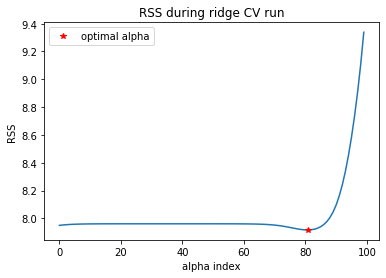

In [130]:
RSS = np.zeros((100,))

for i, alpha in enumerate(np.logspace(-9, 3, num=100)):
    ridge = RidgeCV(alphas=[alpha], cv=5, scoring='neg_mean_squared_error').fit(x_train, y_train)
    preds = ridge.predict(x_test)
    RSS[i] = np.sum((preds - y_test)**2)

#print(np.logspace(-9, 3, num=100))
print(np.logspace(-9, 3, num=100)[81])
print(np.argmin(RSS))
plt.plot(RSS)
plt.plot([81], RSS[81], 'r*', label='optimal alpha')
plt.legend()
plt.title('RSS during ridge CV run')
plt.xlabel('alpha index')
plt.ylabel('RSS')
plt.savefig('./ridge_rss')

In [79]:
ridge = RidgeCV(alphas=np.logspace(-9, 3, num=100), cv=5, scoring='neg_mean_squared_error').fit(x_train, y_train)
print(ridge.alpha_)
print(ridge.coef_)

# MSE
preds = ridge.predict(x_test)
#print(preds, y_test)
print(np.sum((preds - y_test)**2) / preds.shape[0])

46.415888336127914
[ 0.10104242 -0.0114916  -0.02063116  0.01189441 -0.01535552  0.0137883
  0.03113698  0.07951652  0.0263855  -0.01436328]
0.05887150644825215


## Lasso

0.0002848035868435805


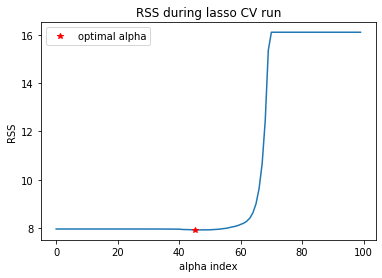

In [100]:
import warnings
warnings.filterwarnings('ignore')
RSS = np.zeros((100,))

for i, alpha in enumerate(np.logspace(-9, 3, num=100)):
    lasso = LassoCV(alphas=[alpha], cv=5, max_iter=10000, tol=1e-3).fit(x_train, y_train)
    preds = lasso.predict(x_test)
    RSS[i] = np.sum((preds - y_test)**2)


arg_min = np.argmin(RSS)
print(np.logspace(-9, 3, num=100)[arg_min])
plt.plot(RSS)
plt.plot([arg_min], RSS[arg_min], 'r*', label='optimal alpha')
plt.legend()
plt.title('RSS during lasso CV run')
plt.xlabel('alpha index')
plt.ylabel('RSS')
plt.savefig('./lasso_rss')

In [101]:
lasso = LassoCV(alphas=np.logspace(-9, 3, num=100), cv=5, max_iter=10000, tol=1e-3).fit(x_train, y_train)
print(lasso.alpha_)
print(lasso.coef_)

# MSE
preds = lasso.predict(x_test)
#print(preds, y_test)
print(np.sum((preds - y_test)**2) / preds.shape[0])

0.008111308307896872
[ 0.11945729 -0.00039932 -0.00344206  0.          0.          0.
  0.04488749  0.08344771  0.         -0.00933468]
0.05912119057139458


## Adaptive Lasso

In [7]:
# adapted from exampe code
gamma = 2

ols_betas = LinearRegression(fit_intercept=False).fit(x_train, y_train).coef_
w_ols = ols_betas**-gamma
X_ols = x_train/w_ols
lambdas, lasso_betas, _ = lasso_path(X_ols, y_train)
print(lambdas.shape, lasso_betas.shape)
print(lasso_betas.shape, w_ols.shape)
lasso_betas = lasso_betas/w_ols[:, None]
lasso_coef = pd.DataFrame(index=lambdas, data=lasso_betas.T)
#display(lasso_coef)
lasso_coef.columns = [f'B{i}' for i in range(1, x_train.shape[1]+1)]
display(lasso_coef)
#print(lasso_coef['B10'].to_list())
non_zero = lasso_coef.abs().mean() > 1e-1
lasso_coef = lasso_coef.loc[:, non_zero]
#print(lasso_coef)

lasso_ad = LassoCV(alphas=lambdas, fit_intercept=False, cv=5).fit(X_ols, y_train) 

print(lasso_ad.alpha_)
print(lasso_ad.coef_)

'''ols_betas_test = LinearRegression(fit_intercept=False).fit(x_test, y_test).coef_
w_ols_test = ols_betas_test**-gamma
X_ols_test = x_test/w_ols_test'''
# MSE
preds = lasso_ad.predict(x_test)
#print(preds, y_test)
print(np.sum((preds - y_test)**2) / preds.shape[0])
#print(np.mean((preds - y_test)**2))

(100,) (10, 100)
(10, 100) (10,)


,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
1.575151e+08,0.0,-0.0,-0.000000,-0.0,0.0,0.000000,0.000000,0.0,0.0,-0.0
1.468991e+08,0.0,-0.0,-0.015275,-0.0,0.0,0.000000,0.000000,0.0,0.0,-0.0
1.369986e+08,0.0,-0.0,-0.029520,-0.0,0.0,0.000000,0.000000,0.0,0.0,-0.0
1.277654e+08,0.0,-0.0,-0.042805,-0.0,0.0,0.000000,0.000000,0.0,0.0,-0.0
1.191544e+08,0.0,-0.0,-0.055195,-0.0,0.0,0.000000,0.000000,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...
2.082257e+05,0.0,-0.0,-0.198851,0.0,-0.0,-0.021133,0.050452,0.0,0.0,0.0
1.941920e+05,0.0,-0.0,-0.199437,0.0,-0.0,-0.023055,0.051766,0.0,0.0,0.0
1.811041e+05,0.0,-0.0,-0.199983,0.0,-0.0,-0.024848,0.052992,0.0,0.0,0.0
1.688983e+05,0.0,-0.0,-0.200493,0.0,-0.0,-0.026520,0.054135,0.0,0.0,0.0


2567103.8665444897
[ 0.00000000e+00 -0.00000000e+00 -3.29540236e-10 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
0.5539290810684947


## Elastic Net

[[45  9]]
0.0002848035868435805


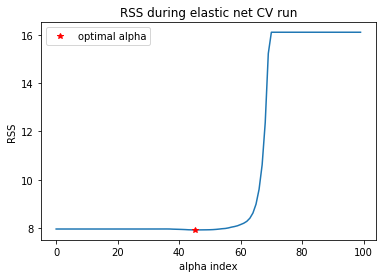

In [117]:
RSS = np.zeros((100,10))

for i, alpha in enumerate(np.logspace(-9, 3, num=100)):
    for j, l1 in enumerate(np.linspace(.1, .99, num=10)):
        elastic = ElasticNetCV(alphas=[alpha], l1_ratio=l1, cv=5).fit(x_train, y_train)
        preds = elastic.predict(x_test)
        RSS[i, j] = np.sum((preds - y_test)**2)


arg_min = np.argwhere(RSS == np.min(RSS))
print(arg_min)
print(np.logspace(-9, 3, num=100)[arg_min[0,0]])
plt.plot(RSS[:, arg_min[0, 1]])
plt.plot([arg_min[0,0]], RSS[arg_min[0,0], arg_min[0, 1]], 'r*', label='optimal alpha')
plt.legend()
plt.title('RSS during elastic net CV run')
plt.xlabel('alpha index')
plt.ylabel('RSS')
plt.savefig('./elastic_rss')

In [118]:
elastic = ElasticNetCV(alphas=np.logspace(-9, 3, num=100), l1_ratio=l1, cv=5).fit(x_train, y_train)
print(elastic.alpha_)
print(elastic.coef_)

# MSE
preds = elastic.predict(x_test)
#print(preds, y_test)
print(np.sum((preds - y_test)**2) / preds.shape[0])

0.008111308307896872
[ 0.1196917  -0.00043234 -0.00282838  0.          0.          0.
  0.04528941  0.08350334  0.         -0.00941161]
0.05910037560925986
